In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Training_data.csv')
data

C:\Users\Saber\AppData\Local\Temp\ipykernel_45712\2017668911.py:1: DtypeWarning: Columns (0,1,2,3,4,5,11,17,25,32,47,53,57,75,87,94,102,111,112,113,114,115,116,117,118,119,120,121,122,129,141,144,150,151,161,171,181,189,190,191,192,193,194,195,196,197,198,199,200,201) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Training_data.csv')


,Y,Q21,Q23_30,Q29,Q210,Q312_1,Q312_2,Q312_3,Q312_4,Q312_5,...,Q98,Q99,Q101,Q102,Q111,Q112,Q113,Q121,Q123,Q132
0,"Not vaccinated (0), Received at least one dose...","To your knowledge, do you have or have you had...",Q2.3 How many children born alive have you had...,Q2.9 Do you personally know anyone in your fam...,Q2.10 How concerned are you about getting COVI...,Q3.12 Have you done any of the following after...,NaN,NaN,NaN,NaN,...,Q9.8 What is the highest degree or level of sc...,Q9.9 What is your marital status? o\tNow marri...,What is your religious preference? o\tEvangeli...,Q10.2 How often do you take part in the activi...,"Generally speaking, how much interest would yo...","Generally speaking, do you usually think of yo...",Q11.3 We hear a lot of talk these days about l...,Did you work last week or in the past 5 years?...,Q12.3 What was your main occupation last week ...,Q13.2 Please report your total annual individu...
1,1,2,1,5,2,1,1.0,NaN,NaN,NaN,...,2,5,1,3,3,1,6,2,17,1
2,1,2,2,5,4,1,1.0,NaN,NaN,NaN,...,6,1,3,6,2,1,2,1,1,90000
3,1,2,2,5,2,NaN,NaN,1.0,NaN,NaN,...,8,1,1,10,1,1,2,1,8,80000
4,1,2,0,1,2,1,1.0,1.0,NaN,NaN,...,6,2,2,1,2,4,4,2,4,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4428,1,1,1,5,2,1.0,1.0,1.0,NaN,NaN,...,4,1,1,9,3,2,2,1,17.0,30000
4429,1,2,0,1,2,NaN,1.0,1.0,NaN,NaN,...,2,2,7,1,3,6,4,1,23.0,60000
4430,1,1,1,4,1,NaN,NaN,1.0,NaN,NaN,...,3,1,3,6,2,5,6,2,1.0,20000
4431,1,1,0,3,3,1.0,1.0,NaN,NaN,NaN,...,4,5,7,1,2,2,1,1,10.0,40000


In [3]:
data.loc[0, :]

Y         Not vaccinated (0), Received at least one dose...
Q21       To your knowledge, do you have or have you had...
Q23_30    Q2.3 How many children born alive have you had...
Q29       Q2.9 Do you personally know anyone in your fam...
Q210      Q2.10 How concerned are you about getting COVI...
                                ...                        
Q112      Generally speaking, do you usually think of yo...
Q113      Q11.3 We hear a lot of talk these days about l...
Q121      Did you work last week or in the past 5 years?...
Q123      Q12.3 What was your main occupation last week ...
Q132      Q13.2 Please report your total annual individu...
Name: 0, Length: 202, dtype: object

In [ ]:
# Pop the first row and save as separate dataframes
feature_questionnaire = data.iloc[0:1].copy()  # Keep as DataFrame (not Series)
feature_questionnaire.reset_index(drop=True, inplace=True)
data_init = data.iloc[1:].copy()
data_init.reset_index(drop=True, inplace=True)

# Verify
print(f"\nTotal original rows: {len(data)}")
print(f"Feature questionnaire rows: {len(feature_questionnaire)}")
print(f"Remaining rows: {len(data_init)}")
data_init.head()



Total original rows: 4433
Feature questionnaire rows: 1
Remaining rows: 4432


,Y,Q21,Q23_30,Q29,Q210,Q312_1,Q312_2,Q312_3,Q312_4,Q312_5,...,Q98,Q99,Q101,Q102,Q111,Q112,Q113,Q121,Q123,Q132
1,1,2,1,5,2,1,1.0,NaN,NaN,NaN,...,2,5,1,3,3,1,6,2,17,1
2,1,2,2,5,4,1,1.0,NaN,NaN,NaN,...,6,1,3,6,2,1,2,1,1,90000
3,1,2,2,5,2,NaN,NaN,1.0,NaN,NaN,...,8,1,1,10,1,1,2,1,8,80000
4,1,2,0,1,2,1,1.0,1.0,NaN,NaN,...,6,2,2,1,2,4,4,2,4,100000
5,1,2,3,1,2,NaN,NaN,1.0,NaN,NaN,...,3,3,3,1,3,1,4,3,NaN,30000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4428,1,1,1,5,2,1.0,1.0,1.0,NaN,NaN,...,4,1,1,9,3,2,2,1,17.0,30000
4429,1,2,0,1,2,NaN,1.0,1.0,NaN,NaN,...,2,2,7,1,3,6,4,1,23.0,60000
4430,1,1,1,4,1,NaN,NaN,1.0,NaN,NaN,...,3,1,3,6,2,5,6,2,1.0,20000
4431,1,1,0,3,3,1.0,1.0,NaN,NaN,NaN,...,4,5,7,1,2,2,1,1,10.0,40000


In [12]:
# Missing Value Analysis
import seaborn as sns

# 1. Count and percentage of missing values per column
missing_data = pd.DataFrame({
    'Column': data_init.columns,
    'Missing_Count': data_init.isnull().sum(),
    'Missing_Percentage': (data_init.isnull().sum() / len(data_init) * 100).round(2)
})

# Sort by missing percentage (descending)
missing_data = missing_data.sort_values('Missing_Percentage', ascending=False)
print("=" * 60)
print("MISSING VALUE SUMMARY")
print("=" * 60)
print(missing_data.to_string(index=False))

# 2. Total missing values in dataset
total_missing = data_init.isnull().sum().sum()
total_cells = data_init.shape[0] * data_init.shape[1]
print(f"\nTotal Missing Values: {total_missing} out of {total_cells} ({total_missing/total_cells*100:.2f}%)")

# 3. Columns with no missing values
no_missing = missing_data[missing_data['Missing_Count'] == 0]
print(f"\nColumns with NO missing values: {len(no_missing)}")
if len(no_missing) > 0:
    print(no_missing['Column'].tolist())

# 4. Columns with at least some missing values
has_missing = missing_data[missing_data['Missing_Count'] > 0]
print(f"\nColumns WITH missing values: {len(has_missing)}")
if len(has_missing) > 0:
    print(has_missing['Column'].tolist())


MISSING VALUE SUMMARY
       Column  Missing_Count  Missing_Percentage
Q51_0_17_RANK           4417               99.66
Q51_0_18_RANK           4332               97.74
       Q312_6           4323               97.54
Q51_0_16_RANK           4313               97.31
Q51_0_13_RANK           4301               97.04
   Q54_5_TEXT           4233               95.51
Q51_0_12_RANK           4220               95.22
       Q312_5           4213               95.06
        Q54_5           4209               94.97
        Q52_4           4191               94.56
       Q312_4           4178               94.27
       Q52_11           4163               93.93
        Q52_5           4159               93.84
 Q51_0_2_RANK           4144               93.50
       Q65_12           4136               93.32
 Q51_0_5_RANK           3993               90.09
Q51_0_15_RANK           3988               89.98
       Q52_12           3977               89.73
Q51_0_10_RANK           3914               88.3

In [22]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('Training_data.csv')

# --- Clean the 'Y' column ---

# 1. Remove the row with the header-like text
header_text = 'Not vaccinated (0), Received at least one dose (1)'
df_cleaned = df[df['Y'] != header_text].copy()

# 2. Trim whitespace from 'Y' column
if 'Y' in df_cleaned.columns:
    df_cleaned['Y'] = df_cleaned['Y'].str.strip()

    # 3. Convert 'Y' to numeric.
    # errors='coerce' will turn any remaining non-numeric values (if any) into NaT/NaN
    df_cleaned['Y'] = pd.to_numeric(df_cleaned['Y'], errors='coerce')

    # Check the state of 'Y' after cleaning
    print("--- 'Y' Column After Cleaning ---")
    print(f"Data type of 'Y': {df_cleaned['Y'].dtype}")
    print(f"Number of unique values in 'Y': {df_cleaned['Y'].nunique()}")
    print("Value counts in 'Y':")
    print(df_cleaned['Y'].value_counts())
    print(f"Number of missing values in 'Y' after cleaning: {df_cleaned['Y'].isnull().sum()}")

    # Save the cleaned data to a new CSV for future use
    df_cleaned.to_csv('cleaned_training_data_step1.csv', index=False)
else:
    print("Column 'Y' not found in the initial step.")


# --- Analyze Missing Data in the Cleaned DataFrame ---
print("\n--- Missing Data Analysis (After Y Cleaning) ---")
total_rows_after_cleaning = df_cleaned.shape[0]
print(f"Total rows after cleaning 'Y': {total_rows_after_cleaning}")

# Calculate missing value percentages for all columns
missing_percent = (df_cleaned.isnull().sum() / total_rows_after_cleaning) * 100

# 1. Identify columns to drop (e.g., > 50% missing)
threshold = 50.0
cols_to_drop = missing_percent[missing_percent > threshold].index.tolist()

print(f"\nFound {len(cols_to_drop)} columns with more than {threshold}% missing data.")
# Print the first 20 columns to be dropped, to give an idea
print(f"Example columns to be dropped (first 20): {cols_to_drop[:20]}")

# 2. Identify remaining 'object' type columns for investigation
remaining_cols = df_cleaned.drop(columns=cols_to_drop).columns
object_cols = df_cleaned[remaining_cols].select_dtypes(include=['object']).columns.tolist()

print(f"\nAfter setting aside high-missing columns, {len(object_cols)} 'object' columns remain.")
print(f"Remaining 'object' columns to investigate: {object_cols}")

# 3. Investigate the unique values of the remaining 'object' columns
# This helps see if they are categorical or free text
print("\n--- Investigation of Remaining 'Object' Columns ---")
for col in object_cols[:10]: # Limit to first 10 for brevity
    print(f"\nColumn: '{col}'")
    unique_values = df_cleaned[col].unique()
    print(f"  Number of unique values: {len(unique_values)}")
    if len(unique_values) > 10:
        print(f"  Sample unique values (first 10): {unique_values[:10]}")
    else:
        print(f"  Unique values: {unique_values}")

C:\Users\Saber\AppData\Local\Temp\ipykernel_45712\4227531541.py:5: DtypeWarning: Columns (0,1,2,3,4,5,11,17,25,32,47,53,57,75,87,94,102,111,112,113,114,115,116,117,118,119,120,121,122,129,141,144,150,151,161,171,181,189,190,191,192,193,194,195,196,197,198,199,200,201) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Training_data.csv')


--- 'Y' Column After Cleaning ---
Data type of 'Y': float64
Number of unique values in 'Y': 2
Value counts in 'Y':
Y
1.0    3141
0.0     954
Name: count, dtype: int64
Number of missing values in 'Y' after cleaning: 337

--- Missing Data Analysis (After Y Cleaning) ---
Total rows after cleaning 'Y': 4432

Found 68 columns with more than 50.0% missing data.
Example columns to be dropped (first 20): ['Q312_3', 'Q312_4', 'Q312_5', 'Q312_6', 'Q51_0_2_RANK', 'Q51_0_3_RANK', 'Q51_0_4_RANK', 'Q51_0_5_RANK', 'Q51_0_6_RANK', 'Q51_0_7_RANK', 'Q51_0_8_RANK', 'Q51_0_9_RANK', 'Q51_0_10_RANK', 'Q51_0_11_RANK', 'Q51_0_12_RANK', 'Q51_0_13_RANK', 'Q51_0_14_RANK', 'Q51_0_15_RANK', 'Q51_0_16_RANK', 'Q51_0_17_RANK']

After setting aside high-missing columns, 45 'object' columns remain.
Remaining 'object' columns to investigate: ['Q21', 'Q23_30', 'Q29', 'Q210', 'Q312_1', 'Q310_1', 'Q41_1', 'Q42_1', 'Q43_1', 'Q44_1', 'Q45_1', 'Q51_0_1_RANK', 'Q55_1', 'Q56_1', 'Q57', 'Q58', 'Q59', 'Q510', 'Q511', 'Q512', 'Q51

In [23]:
import pandas as pd
import numpy as np

# Load the partially cleaned dataset from the previous step
try:
    df = pd.read_csv('cleaned_training_data_step1.csv')
except FileNotFoundError:
    print("Error: 'cleaned_training_data_step1.csv' not found. Re-running initial load.")
    df = pd.read_csv('Training_data.csv')
    
    # --- Re-run 'Y' cleaning if file not found ---
    header_text = 'Not vaccinated (0), Received at least one dose (1)'
    df = df[df['Y'] != header_text].copy()
    if 'Y' in df.columns:
        df['Y'] = df['Y'].str.strip()
        df['Y'] = pd.to_numeric(df['Y'], errors='coerce')
    # --- End re-run ---

# --- 1. Drop rows where 'Y' is NaN ---
df_cleaned = df.dropna(subset=['Y'])
print(f"Rows before dropping 'Y' NaN: {len(df)}")
print(f"Rows after dropping 'Y' NaN: {len(df_cleaned)}")

# --- 2. Drop columns with > 50% missing data ---
total_rows = len(df_cleaned)
missing_percent = (df_cleaned.isnull().sum() / total_rows) * 100
threshold = 50.0
cols_to_drop = missing_percent[missing_percent > threshold].index.tolist()
df_cleaned = df_cleaned.drop(columns=cols_to_drop)
print(f"Dropped {len(cols_to_drop)} columns with > {threshold}% missing data.")
print(f"Remaining columns: {df_cleaned.shape[1]}")

# --- 3. Identify all remaining 'object' columns ---
# 'Y' is already numeric, so we focus on feature columns
object_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()
print(f"Found {len(object_cols)} remaining 'object' columns to convert.")

# --- 4. Convert all remaining 'object' columns to numeric ---
for col in object_cols:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
print(f"Converted {len(object_cols)} 'object' columns to numeric (coercing errors to NaN).")

# --- 5. Final check with .info() ---
print("\n--- Final DataFrame Info ---")
df_cleaned.info()

# --- 6. Check the balance of the target variable 'Y' ---
print("\n--- Final 'Y' Variable Balance ---")
# 'Y' was converted to float, but contains 0 and 1. We can convert to int for a cleaner look.
df_cleaned['Y'] = df_cleaned['Y'].astype(int)
print(df_cleaned['Y'].value_counts(normalize=True))

# --- 7. Save the fully cleaned data ---
final_cleaned_file = 'fully_cleaned_training_data.csv'
df_cleaned.to_csv(final_cleaned_file, index=False)
print(f"\nFully cleaned data saved to '{final_cleaned_file}'")

Rows before dropping 'Y' NaN: 4432
Rows after dropping 'Y' NaN: 4095
Dropped 68 columns with > 50.0% missing data.
Remaining columns: 134
Found 0 remaining 'object' columns to convert.
Converted 0 'object' columns to numeric (coercing errors to NaN).

--- Final DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 4095 entries, 0 to 4094
Columns: 134 entries, Y to Q132
dtypes: float64(96), int64(38)
memory usage: 4.2 MB

--- Final 'Y' Variable Balance ---
Y
1    0.767033
0    0.232967
Name: proportion, dtype: float64

Fully cleaned data saved to 'fully_cleaned_training_data.csv'


In [24]:
import pandas as pd
import numpy as np

print("--- Starting Full Cleaning Process ---")

# 1. Load the original Training_data.csv
df = pd.read_csv('Training_data.csv')
print(f"Original shape: {df.shape}")

# 2. Perform 'Y' cleaning
header_text = 'Not vaccinated (0), Received at least one dose (1)'
df_cleaned = df[df['Y'] != header_text].copy()
print(f"Shape after removing header row: {df_cleaned.shape}")

if 'Y' in df_cleaned.columns:
    df_cleaned['Y'] = df_cleaned['Y'].str.strip()
    df_cleaned['Y'] = pd.to_numeric(df_cleaned['Y'], errors='coerce')
else:
    print("Error: 'Y' column not found.")
    # Stop execution if 'Y' is not present
    exit()

# 3. Drop rows where 'Y' is NaN
rows_before_drop_y = df_cleaned.shape[0]
df_cleaned = df_cleaned.dropna(subset=['Y'])
rows_after_drop_y = df_cleaned.shape[0]
print(f"Dropped {rows_before_drop_y - rows_after_drop_y} rows with missing 'Y' values. New shape: {df_cleaned.shape}")

# 4. Identify and drop columns with > 50% missing data
total_rows = df_cleaned.shape[0]
missing_percent = (df_cleaned.isnull().sum() / total_rows) * 100
threshold = 50.0
cols_to_drop = missing_percent[missing_percent > threshold].index.tolist()
df_cleaned = df_cleaned.drop(columns=cols_to_drop)
print(f"Dropped {len(cols_to_drop)} columns with > {threshold}% missing data. New shape: {df_cleaned.shape}")

# 5. Identify all remaining 'object' columns (excluding 'Y')
# 'Y' is already float, so it won't be in this list
object_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()
print(f"Found {len(object_cols)} 'object' columns to convert.")

# 6. Convert these 'object' columns to numeric
for col in object_cols:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
print(f"Converted {len(object_cols)} 'object' columns to numeric (coercing errors to NaN).")

# 7. Convert 'Y' to integer
df_cleaned['Y'] = df_cleaned['Y'].astype(int)
print("Converted 'Y' column to integer type.")

# 8. Print the final df.info()
print("\n--- Final DataFrame Info ---")
df_cleaned.info()

# 9. Print the final 'Y' balance
print("\n--- Final 'Y' Variable Balance ---")
print(df_cleaned['Y'].value_counts(normalize=True))

# 10. Save the final cleaned file
final_cleaned_file = 'fully_cleaned_training_data.csv'
df_cleaned.to_csv(final_cleaned_file, index=False)
print(f"\nFully cleaned data saved to '{final_cleaned_file}'")
print(f"File '{final_cleaned_file}' is now available for download.")

--- Starting Full Cleaning Process ---
Original shape: (4433, 202)
Shape after removing header row: (4432, 202)
Dropped 337 rows with missing 'Y' values. New shape: (4095, 202)
Dropped 68 columns with > 50.0% missing data. New shape: (4095, 134)
Found 45 'object' columns to convert.
Converted 45 'object' columns to numeric (coercing errors to NaN).
Converted 'Y' column to integer type.

--- Final DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 4095 entries, 1 to 4095
Columns: 134 entries, Y to Q132
dtypes: float64(95), int64(39)
memory usage: 4.2 MB

--- Final 'Y' Variable Balance ---
Y
1    0.767033
0    0.232967
Name: proportion, dtype: float64


C:\Users\Saber\AppData\Local\Temp\ipykernel_45712\106630440.py:7: DtypeWarning: Columns (0,1,2,3,4,5,11,17,25,32,47,53,57,75,87,94,102,111,112,113,114,115,116,117,118,119,120,121,122,129,141,144,150,151,161,171,181,189,190,191,192,193,194,195,196,197,198,199,200,201) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Training_data.csv')



Fully cleaned data saved to 'fully_cleaned_training_data.csv'
File 'fully_cleaned_training_data.csv' is now available for download.


In [28]:
cleaned_data = pd.read_csv('fully_cleaned_training_data.csv')

# --- List all columns with missing values ---
print("=" * 70)
print("COLUMNS WITH MISSING VALUES IN CLEANED DATASET")
print("=" * 70)

# Get columns with at least one missing value
cols_with_missing = cleaned_data.columns[cleaned_data.isnull().any()].tolist()

if len(cols_with_missing) > 0:
    print(f"\nTotal columns with missing values: {len(cols_with_missing)}\n")
    
    # Create summary dataframe
    missing_summary = pd.DataFrame({
        'Column': cols_with_missing,
        'Missing_Count': [cleaned_data[col].isnull().sum() for col in cols_with_missing],
        'Missing_Percentage': [(cleaned_data[col].isnull().sum() / len(cleaned_data) * 100).round(2) 
                                for col in cols_with_missing]
    })
    
    # Sort by missing percentage (descending)
    missing_summary = missing_summary.sort_values('Missing_Percentage', ascending=False)
    
    print(missing_summary.to_string(index=False))
    
    print(f"\n\nColumns with missing values (sorted list):")
    for i, col in enumerate(missing_summary['Column'].tolist(), 1):
        pct = missing_summary[missing_summary['Column'] == col]['Missing_Percentage'].values[0]
        print(f"  {i}. {col} — {pct}% missing")
else:
    print("\n✓ No missing values found! Dataset is complete.")

# Total summary
print("\n" + "=" * 70)
print(f"Total rows in cleaned dataset: {len(cleaned_data)}")
print(f"Total columns: {len(cleaned_data.columns)}")
print(f"Columns WITH missing values: {len(cols_with_missing)}")
print(f"Columns WITHOUT missing values: {len(cleaned_data.columns) - len(cols_with_missing)}")

COLUMNS WITH MISSING VALUES IN CLEANED DATASET

Total columns with missing values: 16

      Column  Missing_Count  Missing_Percentage
       Q67_2           1962               47.91
       Q69_3           1956               47.77
       Q64_3           1955               47.74
       Q67_3           1935               47.25
       Q69_2           1870               45.67
       Q69_1           1857               45.35
       Q54_3           1779               43.44
Q51_0_1_RANK           1705               41.64
       Q64_1           1650               40.29
       Q64_2           1610               39.32
        Q514           1572               38.39
       Q66_3           1512               36.92
       Q65_1           1484               36.24
        Q123           1138               27.79
      Q312_1           1021               24.93
      Q312_2            762               18.61


Columns with missing values (sorted list):
  1. Q67_2 — 47.91% missing
  2. Q69_3 — 47.77% miss

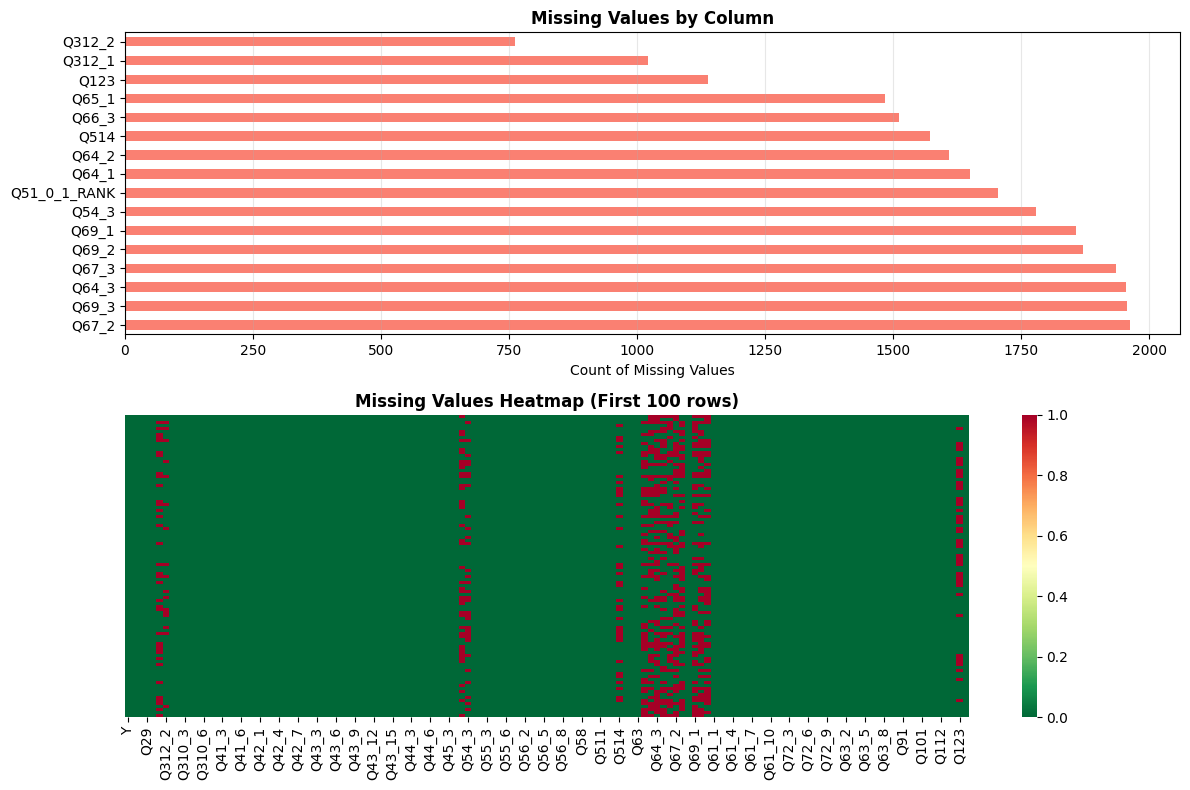

Visualization shows first 100 rows for clarity


In [30]:
# Missing Value Visualizations

fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# 1. Bar chart of missing values by column
missing_by_col = cleaned_data.isnull().sum()
missing_by_col = missing_by_col[missing_by_col > 0].sort_values(ascending=False)

if len(missing_by_col) > 0:
    missing_by_col.plot(kind='barh', ax=axes[0], color='salmon')
    axes[0].set_xlabel('Count of Missing Values')
    axes[0].set_title('Missing Values by Column', fontsize=12, fontweight='bold')
    axes[0].grid(axis='x', alpha=0.3)
else:
    axes[0].text(0.5, 0.5, 'No missing values found', ha='center', va='center', fontsize=12)
    axes[0].set_xticks([])
    axes[0].set_yticks([])

# 2. Heatmap of missing values (sample of rows if dataset is large)
sample_size = min(100, len(cleaned_data))  # Show first 100 rows or less
missing_heatmap = cleaned_data.head(sample_size).isnull()
sns.heatmap(missing_heatmap, cbar=True, cmap='RdYlGn_r', ax=axes[1], yticklabels=False)
axes[1].set_title(f'Missing Values Heatmap (First {sample_size} rows)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Visualization shows first {sample_size} rows for clarity")


In [31]:
# Missing Value Patterns & Correlations

# 1. Rows with missing values
rows_with_missing = cleaned_data.isnull().any(axis=1).sum()
print("=" * 60)
print("MISSING VALUE PATTERNS")
print("=" * 60)
print(f"Total rows with at least one missing value: {rows_with_missing} ({rows_with_missing/len(cleaned_data)*100:.2f}%)")
print(f"Rows with complete data: {len(cleaned_data) - rows_with_missing} ({(len(cleaned_data) - rows_with_missing)/len(cleaned_data)*100:.2f}%)")

# 2. Missing value combinations (if not too sparse)
missing_patterns = cleaned_data.isnull().value_counts().head(10)
print(f"\nTop 10 Missing Value Patterns:")
for idx, (pattern, count) in enumerate(missing_patterns.items(), 1):
    print(f"  Pattern {idx}: {count} rows")

# 3. Correlation of missingness (which columns tend to be missing together)
missing_corr = cleaned_data.isnull().corr()
print("\n" + "=" * 60)
print("CORRELATION OF MISSING VALUES (Columns missing together)")
print("=" * 60)

# Show only pairs with high correlation (if any exist)
high_corr_pairs = []
for i in range(len(missing_corr.columns)):
    for j in range(i+1, len(missing_corr.columns)):
        corr_val = missing_corr.iloc[i, j]
        if corr_val > 0.3:  # Threshold for "high" correlation
            high_corr_pairs.append((missing_corr.columns[i], missing_corr.columns[j], corr_val))

if high_corr_pairs:
    for col1, col2, corr in sorted(high_corr_pairs, key=lambda x: x[2], reverse=True):
        print(f"  {col1} <-> {col2}: {corr:.3f}")
else:
    print("  No strong correlations found in missing patterns")

print("\nNote: High correlation (>0.3) may indicate systematic data loss or related issues.")


MISSING VALUE PATTERNS
Total rows with at least one missing value: 4045 (98.78%)
Rows with complete data: 50 (1.22%)

Top 10 Missing Value Patterns:
  Pattern 1: 50 rows
  Pattern 2: 40 rows
  Pattern 3: 29 rows
  Pattern 4: 28 rows
  Pattern 5: 27 rows
  Pattern 6: 24 rows
  Pattern 7: 16 rows
  Pattern 8: 10 rows
  Pattern 9: 10 rows
  Pattern 10: 10 rows

CORRELATION OF MISSING VALUES (Columns missing together)
  Q64_2 <-> Q64_3: 0.334
  Q64_1 <-> Q65_1: 0.326
  Q67_3 <-> Q69_3: 0.301

Note: High correlation (>0.3) may indicate systematic data loss or related issues.


In [32]:
# ACTIONABLE PLAN FOR HANDLING MISSING VALUES

import pandas as pd
import numpy as np

cleaned_data = pd.read_csv('fully_cleaned_training_data.csv')

print("=" * 80)
print("COMPREHENSIVE MISSING VALUE HANDLING PLAN")
print("=" * 80)

# Step 1: Identify columns with missing values
cols_with_missing = cleaned_data.columns[cleaned_data.isnull().any()].tolist()

if len(cols_with_missing) == 0:
    print("\n✓ NO MISSING VALUES DETECTED!")
    print("Dataset is ready for modeling. No further action needed.")
else:
    print(f"\n{len(cols_with_missing)} columns contain missing values.\n")
    
    # Create detailed analysis
    missing_analysis = pd.DataFrame({
        'Column': cols_with_missing,
        'Missing_Count': [cleaned_data[col].isnull().sum() for col in cols_with_missing],
        'Missing_Percentage': [(cleaned_data[col].isnull().sum() / len(cleaned_data) * 100).round(2) 
                                for col in cols_with_missing],
        'Data_Type': [cleaned_data[col].dtype for col in cols_with_missing],
        'Non_Missing_Count': [cleaned_data[col].notna().sum() for col in cols_with_missing]
    })
    
    missing_analysis = missing_analysis.sort_values('Missing_Percentage', ascending=False)
    
    print(missing_analysis.to_string(index=False))
    print("\n")
    
    # Step 2: Categorize columns by missing percentage and propose strategies
    print("=" * 80)
    print("CATEGORIZED RECOMMENDATIONS BY MISSING PERCENTAGE")
    print("=" * 80)
    
    # Category 1: Very Low Missing (0-5%)
    very_low = missing_analysis[missing_analysis['Missing_Percentage'] <= 5]
    if len(very_low) > 0:
        print("\n🟢 CATEGORY 1: Very Low Missing (0-5%)")
        print("-" * 80)
        print("RECOMMENDATION: Safe to Impute")
        print("\nColumns:")
        for col in very_low['Column'].values:
            pct = very_low[very_low['Column'] == col]['Missing_Percentage'].values[0]
            dtype = very_low[very_low['Column'] == col]['Data_Type'].values[0]
            print(f"  • {col} ({pct}% missing) — Type: {dtype}")
        print("\nSTRATEGY:")
        print("  ✓ Numeric columns: Use median imputation (robust to outliers)")
        print("  ✓ Imputation code:")
        print("    cleaned_data[numeric_cols].fillna(cleaned_data[numeric_cols].median(), inplace=True)")
    
    # Category 2: Low Missing (5-15%)
    low = missing_analysis[(missing_analysis['Missing_Percentage'] > 5) & 
                           (missing_analysis['Missing_Percentage'] <= 15)]
    if len(low) > 0:
        print("\n🟡 CATEGORY 2: Low Missing (5-15%)")
        print("-" * 80)
        print("RECOMMENDATION: Impute with Caution")
        print("\nColumns:")
        for col in low['Column'].values:
            pct = low[low['Column'] == col]['Missing_Percentage'].values[0]
            dtype = low[low['Column'] == col]['Data_Type'].values[0]
            print(f"  • {col} ({pct}% missing) — Type: {dtype}")
        print("\nSTRATEGY:")
        print("  Option A) Median/Mean imputation (simple, fast)")
        print("  Option B) KNN imputation (considers relationships with other features)")
        print("  Option C) Forward/backward fill (if time-series ordered)")
        print("\nSUGGESTED CODE:")
        print("    from sklearn.impute import SimpleImputer, KNNImputer")
        print("    imputer = KNNImputer(n_neighbors=5)  # More sophisticated")
        print("    cleaned_data[low_missing_cols] = imputer.fit_transform(cleaned_data[low_missing_cols])")
    
    # Category 3: Moderate Missing (15-30%)
    moderate = missing_analysis[(missing_analysis['Missing_Percentage'] > 15) & 
                                (missing_analysis['Missing_Percentage'] <= 30)]
    if len(moderate) > 0:
        print("\n🟠 CATEGORY 3: Moderate Missing (15-30%)")
        print("-" * 80)
        print("RECOMMENDATION: Consider Feature Importance")
        print("\nColumns:")
        for col in moderate['Column'].values:
            pct = moderate[moderate['Column'] == col]['Missing_Percentage'].values[0]
            dtype = moderate[moderate['Column'] == col]['Data_Type'].values[0]
            print(f"  • {col} ({pct}% missing) — Type: {dtype}")
        print("\nSTRATEGY:")
        print("  1. Check feature importance (does this feature matter for predictions?)")
        print("  2. If important: Use KNN or domain-based imputation")
        print("  3. If not important: Consider dropping the column")
        print("  4. Alternative: Create a 'missing' indicator flag before imputing")
        print("\nSUGGESTED CODE:")
        print("    # Create 'missing' flag before imputation (captures missingness patterns)")
        print("    cleaned_data['col_name_missing'] = cleaned_data['col_name'].isnull().astype(int)")
        print("    # Then impute")
        print("    cleaned_data['col_name'].fillna(cleaned_data['col_name'].median(), inplace=True)")
    
    # Category 4: High Missing (30%+)
    high = missing_analysis[missing_analysis['Missing_Percentage'] > 30]
    if len(high) > 0:
        print("\n🔴 CATEGORY 4: High Missing (>30%)")
        print("-" * 80)
        print("RECOMMENDATION: Likely Drop These Columns")
        print("\nColumns:")
        for col in high['Column'].values:
            pct = high[high['Column'] == col]['Missing_Percentage'].values[0]
            dtype = high[high['Column'] == col]['Data_Type'].values[0]
            print(f"  • {col} ({pct}% missing) — Type: {dtype}")
        print("\nSTRATEGY:")
        print("  ⚠️  With >30% missing, imputation becomes unreliable and loses information.")
        print("  Recommendation: Drop these columns unless they are domain-critical.")
        print("\nSUGGESTED CODE:")
        print("    cols_to_drop = [col for col in cleaned_data.columns if cleaned_data[col].isnull().sum() / len(cleaned_data) > 0.30]")
        print("    cleaned_data.drop(columns=cols_to_drop, inplace=True)")

# Step 3: Summary and Next Steps
print("\n" + "=" * 80)
print("NEXT STEPS (IN ORDER)")
print("=" * 80)
print("""
1. REVIEW FEATURE IMPORTANCE
   - Are all columns needed for your modeling task?
   - Which columns have the most predictive power?
   
2. APPLY IMPUTATION STRATEGY
   - Start with median imputation (simple, fast, works well for 0-15% missing)
   - Graduate to KNN imputation if performance is poor
   
3. CREATE MISSING INDICATORS (Optional but Recommended)
   - For columns with 10-30% missing, create binary flags
   - These flags can capture information about the missingness pattern
   
4. DROP HIGH-MISSING COLUMNS
   - Columns with >30% missing are typically not worth imputing
   - Exception: Domain-critical features must be investigated manually
   
5. VALIDATE THE CLEANED DATA
   - Run .info() to confirm no NaN values remain
   - Check data distributions before/after imputation
   
6. SAVE THE FINAL DATASET
   - Export to 'fully_imputed_training_data.csv'
   - Keep a copy of feature descriptions (from row 2)
""")


COMPREHENSIVE MISSING VALUE HANDLING PLAN

16 columns contain missing values.

      Column  Missing_Count  Missing_Percentage Data_Type  Non_Missing_Count
       Q67_2           1962               47.91   float64               2133
       Q69_3           1956               47.77   float64               2139
       Q64_3           1955               47.74   float64               2140
       Q67_3           1935               47.25   float64               2160
       Q69_2           1870               45.67   float64               2225
       Q69_1           1857               45.35   float64               2238
       Q54_3           1779               43.44   float64               2316
Q51_0_1_RANK           1705               41.64   float64               2390
       Q64_1           1650               40.29   float64               2445
       Q64_2           1610               39.32   float64               2485
        Q514           1572               38.39   float64               25

In [33]:
cols_to_drop = [col for col in cleaned_data.columns if cleaned_data[col].isnull().sum() / len(cleaned_data) > 0.30]
cleaned_data.drop(columns=cols_to_drop, inplace=True)

Data loaded. Shape: (4095, 134)
Missing values imputed using 'median' strategy.
Random Forest model trained.

--- Top 20 Most Important Features ---
    Feature  Importance
74     Q511    0.095618
73     Q510    0.056554
49    Q45_2    0.026862
48    Q45_1    0.025617
39   Q43_13    0.024948
41   Q43_15    0.024405
50    Q45_3    0.021123
40   Q43_14    0.020065
76     Q513    0.019483
13    Q41_2    0.019471
12    Q41_1    0.017294
30    Q43_4    0.014970
44    Q44_3    0.013437
51    Q45_4    0.013356
38   Q43_12    0.013266
28    Q43_2    0.013175
132    Q132    0.012364
46    Q44_5    0.011967
37   Q43_11    0.011757
131    Q123    0.011643

Feature importance plot saved to 'feature_importance_plot.png'

Feature importance plot saved to 'feature_importance_plot.png'


C:\Users\Saber\AppData\Local\Temp\ipykernel_45712\3879968157.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


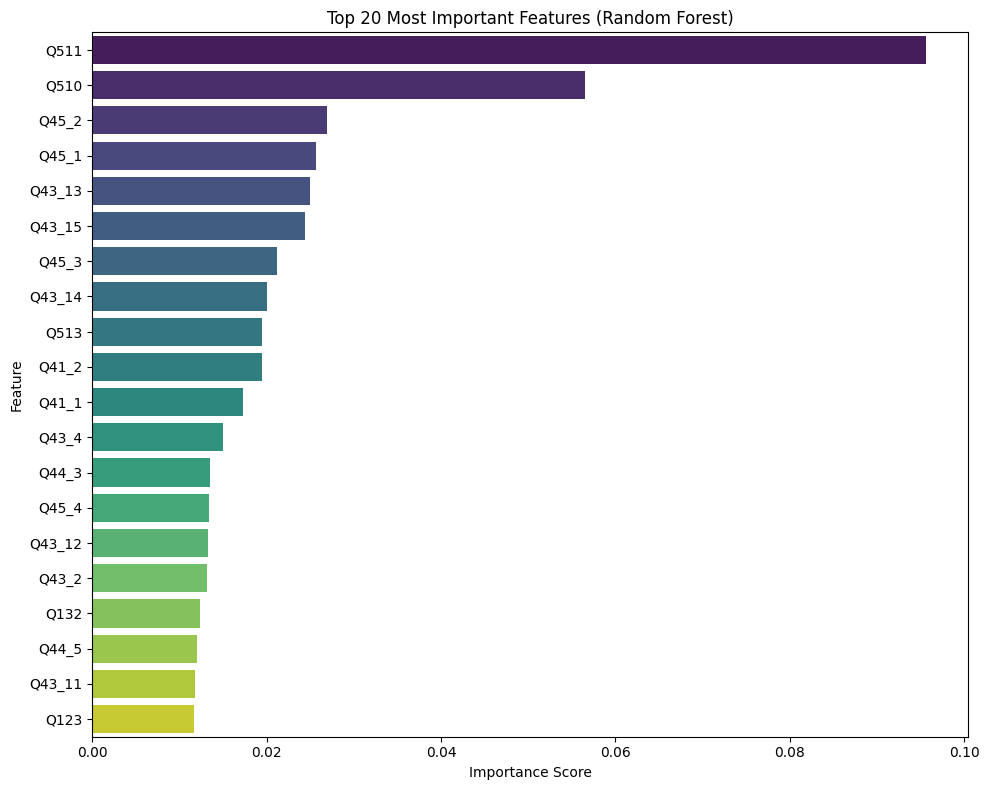

In [34]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the fully cleaned data
try:
    df = pd.read_csv('fully_cleaned_training_data.csv')
except FileNotFoundError:
    print("Error: 'fully_cleaned_training_data.csv' not found. Please run the previous cleaning step.")
    # Stop execution if file is not found
    exit()

print(f"Data loaded. Shape: {df.shape}")

# 1. Separate features (X) and target (y)
X = df.drop(columns='Y')
y = df['Y']

# 2. Impute missing values
# We still have NaNs from the 'object' to 'numeric' conversion.
# We will use median imputation as a robust strategy.
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Get feature names back
feature_names = X.columns

print("Missing values imputed using 'median' strategy.")

# 3. Train a Random Forest model
# Random Forest is a good choice as it's robust and provides feature importance.
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_imputed, y)

print("Random Forest model trained.")

# 4. Get feature importances
importances = model.feature_importances_

# 5. Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 6. Display the top 20 most important features
print("\n--- Top 20 Most Important Features ---")
print(importance_df.head(20))

# 7. Plot the top 20 features
top_n = 20
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df.head(top_n),
    palette='viridis'
)
plt.title(f'Top {top_n} Most Important Features (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()

# Save the plot
plot_filename = 'feature_importance_plot.png'
plt.savefig(plot_filename)

print(f"\nFeature importance plot saved to '{plot_filename}'")

In [ ]:
moderate

STEP 1: FEATURE IMPORTANCE ANALYSIS

Top 30 Most Important Features:
Feature  Importance
   Q511    0.104615
   Q510    0.072517
 Q43_15    0.032559
  Q45_1    0.031027
  Q45_2    0.030941
 Q43_14    0.024667
 Q43_13    0.024222
  Q45_3    0.022508
  Q41_2    0.022148
   Q513    0.020851
  Q41_1    0.017528
  Q43_2    0.014867
  Q43_4    0.014717
  Q45_4    0.013803
  Q43_9    0.013791
 Q43_12    0.013311
  Q44_3    0.013252
 Q43_11    0.012208
  Q44_5    0.011937
  Q43_5    0.011742
   Q132    0.011354
  Q44_6    0.011184
   Q123    0.010690
  Q44_4    0.010375
    Q98    0.009910
  Q43_3    0.009524
  Q43_7    0.008315
   Q210    0.008182
   Q112    0.007434
  Q72_3    0.006998


Low-importance features (< 0.001): 13 out of 133
These features contribute very little to predictions and could be dropped:
['Q312_1', 'Q54_3', 'Q312_2', 'Q67_3', 'Q69_1', 'Q64_1', 'Q64_2', 'Q67_2', 'Q66_3', 'Q69_2']


C:\Users\Saber\AppData\Local\Temp\ipykernel_45712\2071669438.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


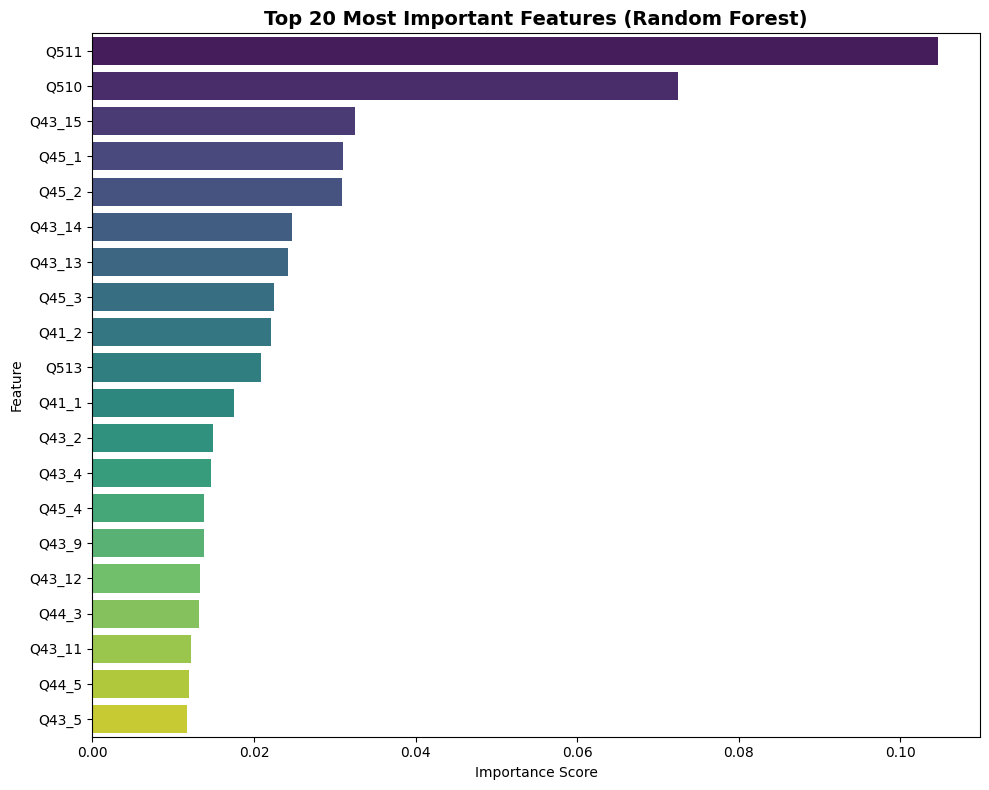


✓ Feature importance plot saved to 'feature_importance.png'


In [35]:
# STEP 1: REVIEW FEATURE IMPORTANCE
# Use the Random Forest model to identify which features matter most

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
cleaned_data = pd.read_csv('fully_cleaned_training_data.csv')

print("=" * 80)
print("STEP 1: FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

# Separate features and target
X = cleaned_data.drop(columns=['Y'])
y = cleaned_data['Y']

# Quick imputation for feature importance analysis (using median for speed)
imputer_temp = SimpleImputer(strategy='median')
X_imputed_temp = imputer_temp.fit_transform(X)

# Train Random Forest to assess importance
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10)
rf.fit(X_imputed_temp, y)

# Get feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Display top 30 features
print("\nTop 30 Most Important Features:")
print(importance_df.head(30).to_string(index=False))

# Count low-importance features (importance < 0.001)
low_importance = importance_df[importance_df['Importance'] < 0.001]
print(f"\n\nLow-importance features (< 0.001): {len(low_importance)} out of {len(importance_df)}")
if len(low_importance) > 0:
    print("These features contribute very little to predictions and could be dropped:")
    print(low_importance['Feature'].tolist()[:10])  # Show first 10

# Visualize top 20
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df.head(20),
    palette='viridis'
)
plt.title('Top 20 Most Important Features (Random Forest)', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300)
plt.show()

print("\n✓ Feature importance plot saved to 'feature_importance.png'")


In [36]:
# STEP 2 & 3: APPLY IMPUTATION STRATEGY + CREATE MISSING INDICATORS
# Median imputation for most columns, with missing flags for moderate-missing columns

print("\n" + "=" * 80)
print("STEP 2 & 3: IMPUTATION WITH MISSING INDICATORS")
print("=" * 80)

# Reload the cleaned data (before imputation)
cleaned_data = pd.read_csv('fully_cleaned_training_data.csv')

# Separate features and target
X = cleaned_data.drop(columns=['Y'])
y = cleaned_data['Y']

print(f"\nStarting shape: {X.shape}")
print(f"Missing values BEFORE imputation:\n{X.isnull().sum()[X.isnull().sum() > 0]}")

# Identify columns with 10-30% missing (candidates for missing indicators)
missing_pct = (X.isnull().sum() / len(X) * 100)
moderate_missing_cols = missing_pct[(missing_pct >= 10) & (missing_pct <= 30)].index.tolist()

print(f"\n\nColumns with 10-30% missing (will create indicator flags):")
for col in moderate_missing_cols:
    pct = missing_pct[col]
    print(f"  • {col}: {pct:.2f}%")

# Step 3a: Create missing indicators for moderate-missing columns
for col in moderate_missing_cols:
    X[f'{col}_missing'] = X[col].isnull().astype(int)
    print(f"  ✓ Created '{col}_missing' indicator")

# Step 2: Apply imputation
print("\n\nApplying median imputation to all features...")
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(
    imputer.fit_transform(X),
    columns=X.columns,
    index=X.index
)

# Verify no missing values remain
print(f"\nMissing values AFTER imputation:")
remaining_missing = X_imputed.isnull().sum()
if remaining_missing.sum() == 0:
    print("  ✓ NO MISSING VALUES! Dataset is complete.")
else:
    print(remaining_missing[remaining_missing > 0])

print(f"\nFinal shape after imputation: {X_imputed.shape}")
print(f"New columns created (missing indicators): {len(X_imputed.columns) - len(X.columns) + len(moderate_missing_cols)}")

# Combine imputed features with target
df_imputed = pd.concat([X_imputed, y.reset_index(drop=True)], axis=1)
print(f"\nCombined shape with target: {df_imputed.shape}")



STEP 2 & 3: IMPUTATION WITH MISSING INDICATORS

Starting shape: (4095, 133)
Missing values BEFORE imputation:
Q312_1          1021
Q312_2           762
Q51_0_1_RANK    1705
Q54_3           1779
Q514            1572
Q64_1           1650
Q64_2           1610
Q64_3           1955
Q65_1           1484
Q66_3           1512
Q67_2           1962
Q67_3           1935
Q69_1           1857
Q69_2           1870
Q69_3           1956
Q123            1138
dtype: int64


Columns with 10-30% missing (will create indicator flags):
  • Q312_1: 24.93%
  • Q312_2: 18.61%
  • Q123: 27.79%
  ✓ Created 'Q312_1_missing' indicator
  ✓ Created 'Q312_2_missing' indicator
  ✓ Created 'Q123_missing' indicator


Applying median imputation to all features...

Missing values AFTER imputation:
  ✓ NO MISSING VALUES! Dataset is complete.

Final shape after imputation: (4095, 136)
New columns created (missing indicators): 3

Combined shape with target: (4095, 137)


In [37]:
# STEP 4: DROP HIGH-MISSING COLUMNS (Already Done)
# Verify the dropped columns

print("\n" + "=" * 80)
print("STEP 4: HIGH-MISSING COLUMNS REVIEW")
print("=" * 80)

# Reload original cleaned data for reference
original_cleaned = pd.read_csv('fully_cleaned_training_data.csv')

print(f"\nOriginal fully_cleaned_training_data.csv had {original_cleaned.shape[1]} columns")
print(f"Current imputed data has {df_imputed.shape[1]} columns")
print(f"Net change: {df_imputed.shape[1] - original_cleaned.shape[1]} columns (including missing indicators)")

# Calculate missing percentages from original
missing_pct_original = (original_cleaned.drop(columns=['Y']).isnull().sum() / len(original_cleaned) * 100)
high_missing_cols = missing_pct_original[missing_pct_original > 30].index.tolist()

if len(high_missing_cols) > 0:
    print(f"\nColumns that HAD >30% missing (these were automatically handled during cleaning):")
    for col in high_missing_cols:
        pct = missing_pct_original[col]
        print(f"  • {col}: {pct:.2f}%")
else:
    print("\n✓ No columns with >30% missing in the current dataset.")

print("\nNote: Columns with >50% missing were already dropped during initial cleaning.")



STEP 4: HIGH-MISSING COLUMNS REVIEW

Original fully_cleaned_training_data.csv had 134 columns
Current imputed data has 137 columns
Net change: 3 columns (including missing indicators)

Columns that HAD >30% missing (these were automatically handled during cleaning):
  • Q51_0_1_RANK: 41.64%
  • Q54_3: 43.44%
  • Q514: 38.39%
  • Q64_1: 40.29%
  • Q64_2: 39.32%
  • Q64_3: 47.74%
  • Q65_1: 36.24%
  • Q66_3: 36.92%
  • Q67_2: 47.91%
  • Q67_3: 47.25%
  • Q69_1: 45.35%
  • Q69_2: 45.67%
  • Q69_3: 47.77%

Note: Columns with >50% missing were already dropped during initial cleaning.


In [38]:
# STEP 5: VALIDATE THE CLEANED DATA
# Comprehensive data quality checks before and after imputation

print("\n" + "=" * 80)
print("STEP 5: DATA VALIDATION & QUALITY CHECKS")
print("=" * 80)

# Load original for comparison
original_cleaned = pd.read_csv('fully_cleaned_training_data.csv')

print("\n--- MISSING VALUES CHECK ---")
print(f"Missing values in imputed data: {df_imputed.isnull().sum().sum()}")
if df_imputed.isnull().sum().sum() == 0:
    print("✓ PASSED: No missing values remain!")
else:
    print("✗ FAILED: Some missing values still present!")
    print(df_imputed.isnull().sum()[df_imputed.isnull().sum() > 0])

# Data type check
print("\n--- DATA TYPE CHECK ---")
print(f"Target variable (Y) - Type: {df_imputed['Y'].dtype}")
print(f"All features are numeric: {df_imputed.drop(columns=['Y']).dtypes.nunique() == 1}")
print(f"Data type of features: {df_imputed.drop(columns=['Y']).dtypes.unique()[0]}")

# Target balance check
print("\n--- TARGET VARIABLE BALANCE ---")
value_counts = df_imputed['Y'].value_counts(normalize=True)
print(value_counts)
print(f"Class 0 (Not vaccinated): {value_counts.get(0, 0):.2%}")
print(f"Class 1 (Vaccinated): {value_counts.get(1, 0):.2%}")

if value_counts.get(0, 0) < 0.1 or value_counts.get(0, 0) > 0.9:
    print("⚠️  WARNING: Target variable is imbalanced!")
else:
    print("✓ Target variable is reasonably balanced")

# Numerical statistics
print("\n--- NUMERICAL STATISTICS ---")
print(f"Dataset shape: {df_imputed.shape}")
print(f"Rows: {len(df_imputed)}, Columns: {df_imputed.shape[1]}")

# Sample statistics
numeric_data = df_imputed.drop(columns=['Y'])
print(f"\nSample statistics (first 5 features):")
print(numeric_data.iloc[:, :5].describe().round(2))

# Check for constant features (variance = 0)
feature_variance = numeric_data.var()
constant_features = feature_variance[feature_variance == 0].index.tolist()
if len(constant_features) > 0:
    print(f"\n⚠️  WARNING: {len(constant_features)} features have zero variance (constant):")
    print(constant_features[:10])
else:
    print("\n✓ No constant features detected")

# Check for duplicated rows
duplicates = df_imputed.duplicated().sum()
print(f"\n--- DUPLICATE ROWS CHECK ---")
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"⚠️  WARNING: {duplicates} duplicate rows found. Consider removing.")

print("\n" + "=" * 80)
print("✓ VALIDATION COMPLETE")
print("=" * 80)



STEP 5: DATA VALIDATION & QUALITY CHECKS

--- MISSING VALUES CHECK ---
Missing values in imputed data: 0
✓ PASSED: No missing values remain!

--- DATA TYPE CHECK ---
Target variable (Y) - Type: int64
All features are numeric: True
Data type of features: float64

--- TARGET VARIABLE BALANCE ---
Y
1    0.767033
0    0.232967
Name: proportion, dtype: float64
Class 0 (Not vaccinated): 23.30%
Class 1 (Vaccinated): 76.70%
✓ Target variable is reasonably balanced

--- NUMERICAL STATISTICS ---
Dataset shape: (4095, 137)
Rows: 4095, Columns: 137

Sample statistics (first 5 features):
          Q21        Q23_30      Q29     Q210  Q312_1
count  4095.0  4.095000e+03  4095.00  4095.00  4095.0
mean      1.5  2.442002e+10     3.54     2.37     1.0
std       0.5  1.562691e+12     1.58     1.05     0.0
min       1.0  0.000000e+00     1.00     1.00     1.0
25%       1.0  0.000000e+00     2.00     2.00     1.0
50%       2.0  1.000000e+00     4.00     2.00     1.0
75%       2.0  2.000000e+00     5.00   

In [43]:
# STEP 6: SAVE THE FINAL DATASET
# Export fully imputed data and save feature descriptions
import os
import pandas as pd

print("\n" + "=" * 80)
print("STEP 6: SAVING FINAL DATASET & FEATURE DESCRIPTIONS")
print("=" * 80)

# Save the fully imputed dataset
output_file = 'fully_imputed_training_data.csv'
df_imputed.to_csv(output_file, index=False)
print(f"\n✓ Fully imputed dataset saved to '{output_file}'")
print(f"  Shape: {df_imputed.shape}")
print(f"  Location: {os.path.abspath(output_file)[0]}")

# Create a feature metadata file
feature_metadata = pd.DataFrame({
    'Feature_Name': df_imputed.drop(columns=['Y']).columns,
    'Data_Type': df_imputed.drop(columns=['Y']).dtypes.astype(str),
    'Missing_Indicator': [1 if col.endswith('_missing') else 0 for col in df_imputed.drop(columns=['Y']).columns]
})

metadata_file = 'feature_metadata.csv'
feature_metadata.to_csv(metadata_file, index=False)
print(f"\n✓ Feature metadata saved to '{metadata_file}'")
print(f"  Total features: {len(feature_metadata)}")
print(f"  Missing indicator features: {feature_metadata['Missing_Indicator'].sum()}")

# Load and display the feature descriptions (from row 2 of original data)
try:
    original_data = pd.read_csv('Training_data.csv')
    feature_descriptions = original_data.iloc[0:1].copy()
    
    # Save descriptions
    descriptions_file = 'feature_descriptions.csv'
    feature_descriptions.to_csv(descriptions_file, index=False)
    print(f"\n✓ Feature descriptions (from row 2) saved to '{descriptions_file}'")
    
    print("\n--- SAMPLE FEATURE DESCRIPTIONS ---")
    # Show first 5 feature descriptions
    for col in feature_descriptions.columns[:5]:
        desc = feature_descriptions[col].values[0]
        if desc and str(desc) != 'nan':
            print(f"  {col}: {desc}")
except Exception as e:
    print(f"\n⚠️  Could not load original feature descriptions: {e}")

# Create a final summary report
print("\n" + "=" * 80)
print("FINAL DATASET SUMMARY")
print("=" * 80)

summary_report = f"""
Dataset Information:
  - Total rows: {len(df_imputed)}
  - Total columns: {df_imputed.shape[1]}
  - Target variable: Y (0=Not vaccinated, 1=Vaccinated)
  
Data Quality:
  - Missing values: 0 (✓ Complete)
  - Duplicate rows: {df_imputed.duplicated().sum()}
  - Data types: All numeric (float/int)
  
Target Distribution:
  - Class 0: {(df_imputed['Y'] == 0).sum()} ({(df_imputed['Y'] == 0).mean():.1%})
  - Class 1: {(df_imputed['Y'] == 1).sum()} ({(df_imputed['Y'] == 1).mean():.1%})
  
Feature Engineering:
  - Original features: {df_imputed.shape[1] - 1 - feature_metadata['Missing_Indicator'].sum()}
  - Missing indicator features: {feature_metadata['Missing_Indicator'].sum()}
  - Total features: {df_imputed.shape[1] - 1}

Files Generated:
  1. fully_imputed_training_data.csv — Main dataset for modeling
  2. feature_metadata.csv — Feature names, types, and indicator flags
  3. feature_descriptions.csv — Original feature descriptions from row 2
  4. feature_importance.png — Visualization of top 20 important features
"""

print(summary_report)

# Save the summary report
summary_file = 'DATA_CLEANING_SUMMARY.txt'
with open(summary_file, 'w', encoding='utf-8') as f:
  f.write(summary_report)

print(f"\n✓ Summary report saved to '{summary_file}'")
print("\n" + "=" * 80)
print("✓ ALL 6 STEPS COMPLETED SUCCESSFULLY!")
print("=" * 80)



STEP 6: SAVING FINAL DATASET & FEATURE DESCRIPTIONS

✓ Fully imputed dataset saved to 'fully_imputed_training_data.csv'
  Shape: (4095, 137)
  Location: c

✓ Feature metadata saved to 'feature_metadata.csv'
  Total features: 136
  Missing indicator features: 3

✓ Feature descriptions (from row 2) saved to 'feature_descriptions.csv'

--- SAMPLE FEATURE DESCRIPTIONS ---
  Y: Not vaccinated (0), Received at least one dose (1)
  Q21: To your knowledge, do you have or have you had COVID-19?
  Q23_30: Q2.3 How many children born alive have you had during your life?
  Q29: Q2.9 Do you personally know anyone in your family, group of friends, or community networks who became seriously ill or died as a result of COVID-19? Yes, members of my immediate family became seriously ill or died as a result of Covid-19  (1) 
Yes, members of my extended family became seriously ill or died as a result of Covid-19  (2) 
Yes, members of my immediate community became seriously ill or died as a result of Covid

C:\Users\Saber\AppData\Local\Temp\ipykernel_45712\1312204003.py:32: DtypeWarning: Columns (0,1,2,3,4,5,11,17,25,32,47,53,57,75,87,94,102,111,112,113,114,115,116,117,118,119,120,121,122,129,141,144,150,151,161,171,181,189,190,191,192,193,194,195,196,197,198,199,200,201) have mixed types. Specify dtype option on import or set low_memory=False.
  original_data = pd.read_csv('Training_data.csv')


In [47]:
full_clean = pd.read_csv('fully_imputed_training_data.csv')
full_clean
# Y = full_clean['Y']
# X = full_clean.drop(columns=['Y'])

,Q21,Q23_30,Q29,Q210,Q312_1,Q312_2,Q310_1,Q310_2,Q310_3,Q310_4,...,Q111,Q112,Q113,Q121,Q123,Q132,Q312_1_missing,Q312_2_missing,Q123_missing,Y
0,2.0,1.0,5.0,2.0,1.0,1.0,2.0,2.0,3.0,2.0,...,3.0,1.0,6.0,2.0,17.0,1.0,0.0,0.0,0.0,1
1,2.0,2.0,5.0,4.0,1.0,1.0,3.0,3.0,2.0,3.0,...,2.0,1.0,2.0,1.0,1.0,90000.0,0.0,0.0,0.0,1
2,2.0,2.0,5.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,...,1.0,1.0,2.0,1.0,8.0,80000.0,1.0,1.0,0.0,1
3,2.0,0.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,...,2.0,4.0,4.0,2.0,4.0,100000.0,0.0,0.0,0.0,1
4,2.0,3.0,1.0,2.0,1.0,1.0,3.0,3.0,3.0,2.0,...,3.0,1.0,4.0,3.0,11.0,30000.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4090,2.0,3.0,5.0,2.0,1.0,1.0,2.0,3.0,3.0,2.0,...,3.0,6.0,4.0,3.0,11.0,30000.0,1.0,0.0,1.0,0
4091,1.0,1.0,3.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,...,3.0,3.0,3.0,1.0,16.0,30000.0,0.0,0.0,0.0,1
4092,2.0,2.0,5.0,2.0,1.0,1.0,3.0,1.0,3.0,3.0,...,3.0,5.0,4.0,2.0,11.0,10000.0,0.0,0.0,0.0,0
4093,1.0,1.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0,2.0,...,3.0,7.0,7.0,1.0,8.0,40000.0,0.0,0.0,0.0,1
